In [ ]:
import numpy as np
import sklearn
import math

import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

from sklearn.linear_model import LinearRegression


In [ ]:
data = load_boston()
print(data.keys())
X = data.data
y = data.target

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [ ]:
feature_names = data.feature_names
print('data.data :{0}, data.target: {1}, num_features: {2}'.format(X.shape, y.shape, len(feature_names)))
print('num_datapoints : {}'.format(X.shape[0]))

data.data :(506, 13), data.target: (506,), num_features: 13
num_datapoints : 506


In [ ]:
def label_histogram():
  plt.figure(figsize = (6,5))
  plt.hist(y)
  plt.xlabel('price ($1000s)')
  plt.ylabel('count')
  plt.tight_layout()

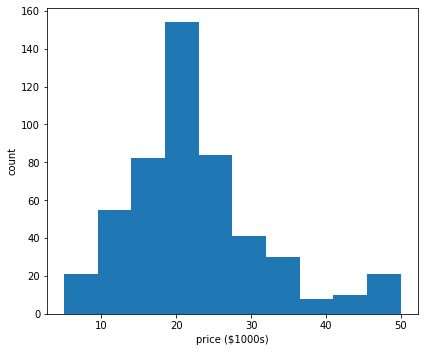

In [ ]:
label_histogram()

In [ ]:
def price_single_feature_ploting(input_data, feature_names):
  fig,axes = plt.subplots(5,3,figsize = (15,15))
  plt.subplots_adjust(bottom = 0.1, right = 0.8, top = 0.9)
  for index, (ax, feature_name) in enumerate(zip(axes.flat[:-2],feature_names)):
    ax.scatter(input_data[:,index],y)
    ax.set(xlabel = feature_name, ylabel = 'price')

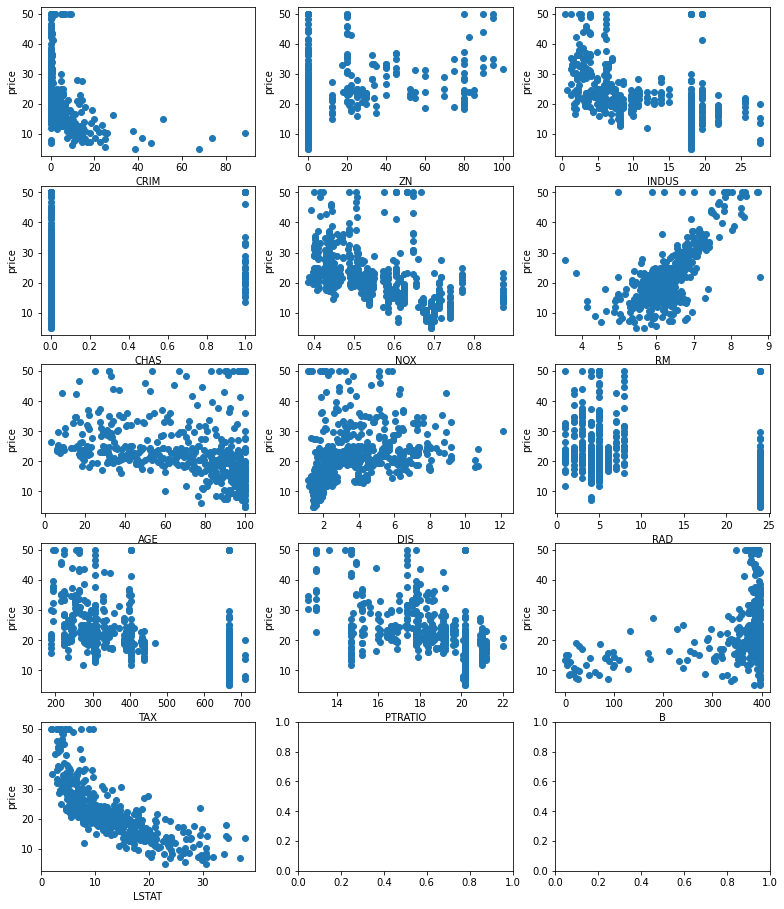

In [ ]:
price_single_feature_ploting(x, feature_names)

In [ ]:
def training(x,y):
  # find coefficients and intercepts
  # multivariate
  # add np array of one to calculate the intercept, the intercept is the sum of all the first column of theta matrix numbers
  Xnew = np.concatenate((X,np.ones((X.shape[0], 1))),axis = 1)
  theta = np.linalg.inv(Xnew.T @ Xnew) @ Xnew.T @ y
  # intercept = np.mean(y) - np.mean(x) * np.mean(theta)
  intercept = np.sum(theta[13])
  return theta[:13], intercept

In [ ]:
coefficients, intercept = training(X,y)
print(intercept)

36.45948838507082


In [ ]:
reg = LinearRegression().fit(X, y)
# reg.coef_
reg.intercept_

36.459488385090125

In [ ]:
assert np.allclose(coefficients,
                   np.array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
                             -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
                             3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
                             -5.24758378e-01]))
assert np.allclose(intercept, 36.459488385090125)

In [ ]:
def prediction(X, coefficients, intercept):
  y_predict = X @ coefficients + intercept
  return y_predict

In [ ]:
y_predict = prediction(X, coefficients, intercept)

In [ ]:
def MSE(X, y_target, coefficients, intercept):
  

In [ ]:
def visualize_results(y_predict, y_target):
    plt.figure(figsize=(5, 4))
    plt.scatter(y_target, y_predict)
    plt.plot([0, 50], [0, 50], '--k')
    plt.axis('tight')
    plt.xlabel('True price ($1000s)')
    plt.ylabel('Predicted price ($1000s)')
    plt.tight_layout()

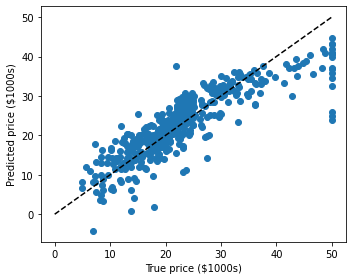

In [ ]:
visualize_results(y_predict,y)